In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# transposing the columns to get a better view 
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.describe().round()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.0,7043.0,7043.0
mean,0.0,32.0,65.0
std,0.0,25.0,30.0
min,0.0,0.0,18.0
25%,0.0,9.0,36.0
50%,0.0,29.0,70.0
75%,0.0,55.0,90.0
max,1.0,72.0,119.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [15]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
df[df['TotalCharges'].isnull()][['customerID','TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,NaN
753,3115-CZMZD,NaN
936,5709-LVOEQ,NaN
1082,4367-NUYAO,NaN
1340,1371-DWPAZ,NaN
3331,7644-OMVMY,NaN
3826,3213-VVOLG,NaN
4380,2520-SGTTA,NaN
5218,2923-ARZLG,NaN
6670,4075-WKNIU,NaN


In [24]:
df['TotalCharges'].fillna(0, inplace = True)

In [27]:
df.head(1).T

,0
customerID,7590-VHVEG
gender,Female
SeniorCitizen,0
Partner,Yes
Dependents,No
tenure,1
PhoneService,No
MultipleLines,No phone service
InternetService,DSL
OnlineSecurity,No


In [33]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [46]:
string_cols = df.columns[df.dtypes == 'object']

In [59]:
for col in string_cols:
    print(col)
    df[col] = df[col].str.lower().replace(' ','_')

customerid
gender
partner
dependents
phoneservice
multiplelines
internetservice
onlinesecurity
onlinebackup
deviceprotection
techsupport
streamingtv
streamingmovies
contract
paperlessbilling
paymentmethod
churn


In [90]:
df['churn'] = pd.get_dummies(df['churn'],drop_first = True)

In [92]:
from sklearn.model_selection import train_test_split

In [95]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [99]:
df_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

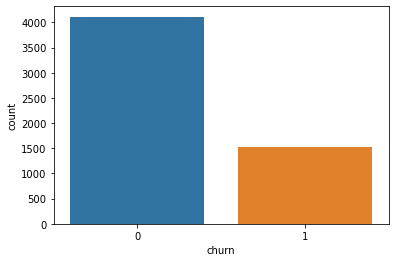

In [106]:
sns.countplot(df_train['churn'])
plt.show()

In [107]:
df_train, df_val = train_test_split(df_train, test_size = 0.33, random_state = 11)

In [108]:
ytrain = df_train.churn.values

In [109]:
yval = df_val.churn.values

In [110]:
df_train.drop('churn', axis = 1, inplace = True)
df_val.drop('churn', axis = 1, inplace = True)

In [111]:
df_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

In [115]:
from imblearn.under_sampling import RandomUnderSampler

In [116]:
rus = RandomUnderSampler()

In [117]:
x, y = rus.fit_resample(df_train, ytrain)

<AxesSubplot:ylabel='count'>

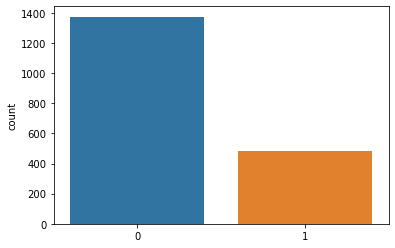

In [120]:
sns.countplot(yval)